In [1]:
library(ggplot2)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.0      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
df_from_file <- read_csv("n_bytes.csv")

Rows: 35923887 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): key
dbl (1): n_bytes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
df <- df_from_file %>% 
        arrange(n_bytes) %>% 
        mutate(
            csum = cumsum(n_bytes), 
            row_num = row_number(), 
            perc_sum_bytes = csum / sum(n_bytes),
            perc_rows = row_num / nrow(df_from_file))

In [6]:
head(df)

key,n_bytes,csum,row_num,perc_rows
<chr>,<dbl>,<dbl>,<int>,<dbl>
imb_plugin-1.0.11.tgz,10,10,1,2.783663e-08
cbk-tools-0.0.1-beta.35.tgz,20,30,2,5.567326e-08
cbk-tools-0.0.1-beta.34.tgz,20,50,3,8.350989e-08
@idn-model-test-1.0.0.tgz,29,79,4,1.113465e-07
npmal-0.0.0.tgz,56,135,5,1.391832e-07
gital-0.0.0.tgz,57,192,6,1.670198e-07


In [7]:
sum(df$n_bytes) / 1000 / 1000 / 1000 / 1000

[1] 26.26573

In [8]:
mean(df$n_bytes)

[1] 731149.5

In [9]:
median(df$n_bytes)

[1] 18323

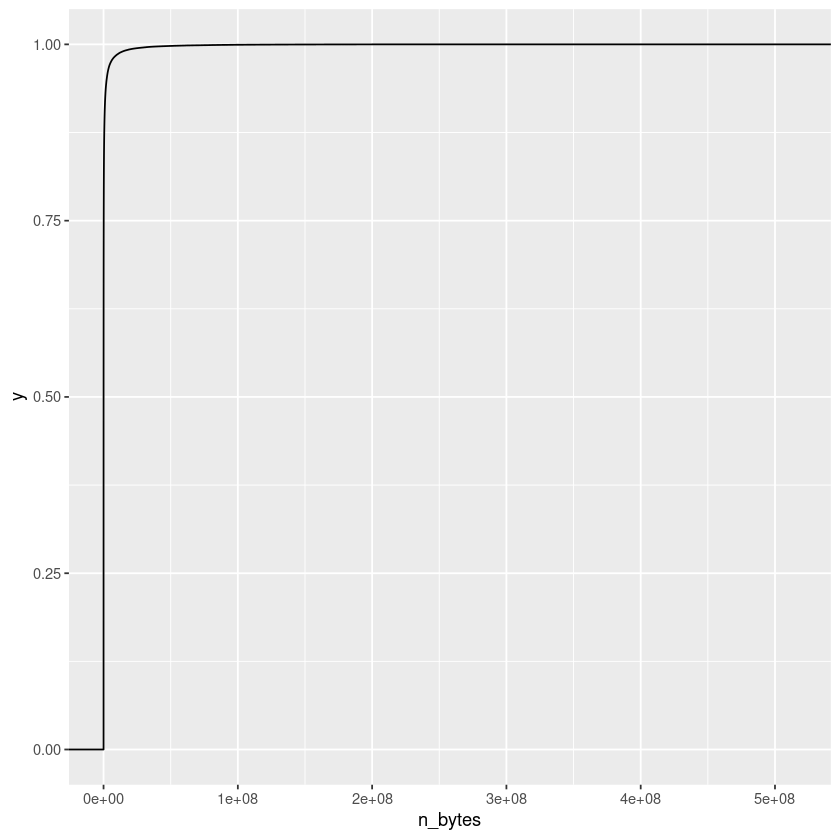

In [10]:
ggplot(df, aes(x=n_bytes)) + stat_ecdf()

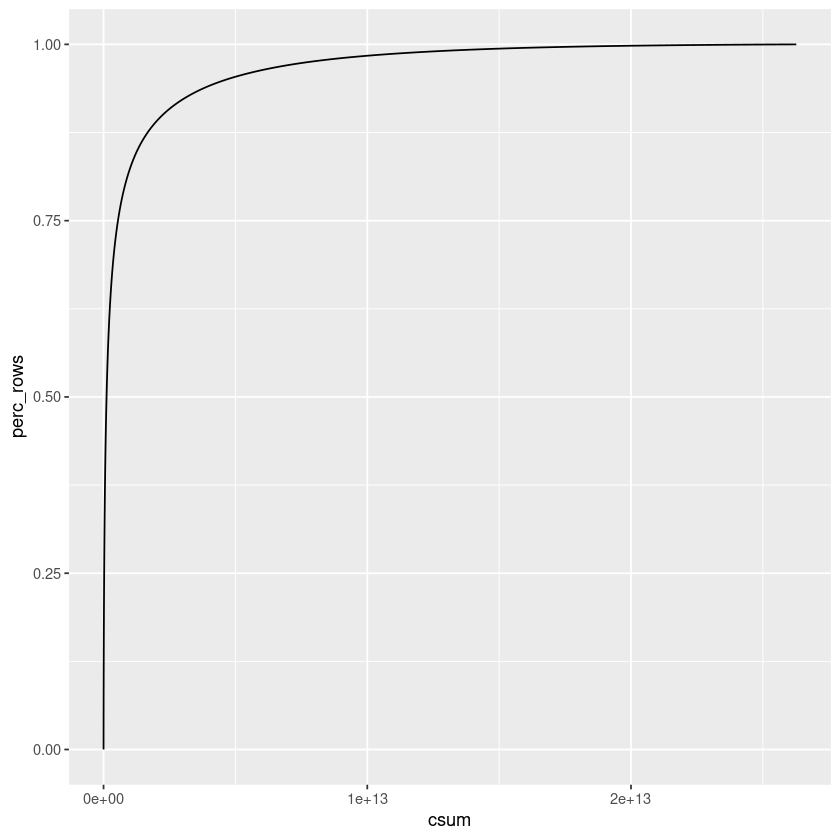

In [11]:
ggplot(df, aes(x=csum, y=perc_rows)) + geom_line()

In [13]:
df %>% filter(perc_sum_bytes <= 0.5)

key,n_bytes,csum,row_num,perc_sum_bytes,perc_rows
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
imb_plugin-1.0.11.tgz,10,10,1,3.807242e-13,2.783663e-08
cbk-tools-0.0.1-beta.35.tgz,20,30,2,1.142173e-12,5.567326e-08
cbk-tools-0.0.1-beta.34.tgz,20,50,3,1.903621e-12,8.350989e-08
@idn-model-test-1.0.0.tgz,29,79,4,3.007721e-12,1.113465e-07
npmal-0.0.0.tgz,56,135,5,5.139777e-12,1.391832e-07
gital-0.0.0.tgz,57,192,6,7.309905e-12,1.670198e-07
gitist-0.0.0.tgz,58,250,7,9.518105e-12,1.948564e-07
shlipidib-0.0.0.tgz,61,311,8,1.184052e-11,2.226931e-07
whatchika-0.0.0.tgz,61,372,9,1.416294e-11,2.505297e-07
